<a href="https://colab.research.google.com/github/juanmg1984/dm2025a/blob/main/Histograma_YAMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Colab-ready ---
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO



# Cargar
df = pd.read_csv("/content/HistoTSL.csv", sep=";")
print(df)

     Q viajes Diferencia percentil
0           3             Sin dato
1           1             Sin dato
2           5             Sin dato
3           7             Sin dato
4          12             Sin dato
..        ...                  ...
421         4              -64,733
422        11                -87,9
423         2             -218,572
424         1              -234,78
425         1              -381,27

[426 rows x 2 columns]


In [ ]:
# Contar filas con "Sin dato" en "Diferencia percentil"
n_sin_dato = (df["Diferencia percentil"] == "Sin dato").sum()

# Calcular el total de filas
total_filas = len(df)

# Calcular el porcentaje de filas con "Sin dato"
pct_sin_dato = 100 * n_sin_dato / total_filas

# Imprimir los resultados
print(f"Registros con 'Sin dato' en 'Diferencia percentil': {n_sin_dato} ({pct_sin_dato:.2f}% del total de filas)")

Registros con 'Sin dato' en 'Diferencia percentil': 30 (7.04% del total de filas)


In [ ]:
# Eliminar registros con "Sin dato" en "Diferencia percentil"
df = df[df["Diferencia percentil"] != "Sin dato"].copy()

# Convertir la columna "Diferencia percentil" a tipo numérico (float)
df["Diferencia percentil"] = df["Diferencia percentil"].astype(str).str.replace(",", ".", regex=False).astype(float)

# Verificar los cambios
print(df.head())
print(f"Nuevo número de filas: {len(df)}")

    Q viajes  Diferencia percentil
30        62               762.558
31         2               762.520
32         4               522.310
33        20               467.595
34        10               262.123
Nuevo número de filas: 396


In [ ]:
# Define custom bins
bins = [-800, -100, -10,0,  10,  100, 800]

# Categorize the data into bins
df_nz['bucket'] = pd.cut(df_nz["Diferencia percentil"], bins=bins, include_lowest=True)

# Calculate the weighted frequency for each bucket
bucket_counts = df_nz.groupby('bucket')['Q viajes'].sum().reset_index()

# Rename columns for clarity
bucket_counts.columns = ['Diferencia percentil Bucket', 'Total Q viajes']

# Display the table
display(bucket_counts)

/tmp/ipython-input-1287982803.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df_nz.groupby('bucket')['Q viajes'].sum().reset_index()


,Diferencia percentil Bucket,Total Q viajes
0,"(-800.001, -100.0]",4
1,"(-100.0, -10.0]",744
2,"(-10.0, 0.0]",3522
3,"(0.0, 10.0]",9852
4,"(10.0, 100.0]",1505
5,"(100.0, 800.0]",426


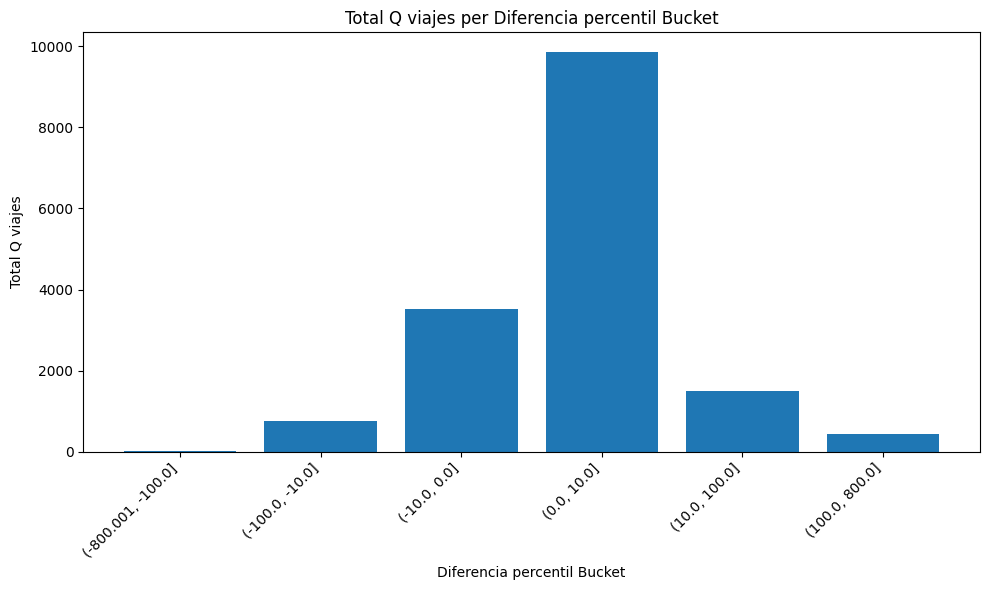

In [ ]:
# Create a vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(bucket_counts['Diferencia percentil Bucket'].astype(str), bucket_counts['Total Q viajes'])
plt.xlabel("Diferencia percentil Bucket")
plt.ylabel("Total Q viajes")
plt.title("Total Q viajes per Diferencia percentil Bucket")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate weighted positive and negative differences
weighted_positive_diff = (df_nz[df_nz['Diferencia percentil'] > 0]['Diferencia percentil'] * df_nz[df_nz['Diferencia percentil'] > 0]['Q viajes']).sum()
weighted_negative_diff = (df_nz[df_nz['Diferencia percentil'] < 0]['Diferencia percentil'] * df_nz[df_nz['Diferencia percentil'] < 0]['Q viajes']).sum()

# Calculate the total number of positive and negative trips
total_positive_trips = df_nz[df_nz['Diferencia percentil'] > 0]['Q viajes'].sum()
total_negative_trips = df_nz[df_nz['Diferencia percentil'] < 0]['Q viajes'].sum()

# Calculate the average positive and negative differences per trip
average_positive_diff_per_trip = weighted_positive_diff / total_positive_trips if total_positive_trips > 0 else 0
average_negative_diff_per_trip = weighted_negative_diff / total_negative_trips if total_negative_trips > 0 else 0

# Calculate the overall weighted sum and average
overall_weighted_diff = (df_nz['Diferencia percentil'] * df_nz['Q viajes']).sum()
total_trips = df_nz['Q viajes'].sum()
overall_average_diff_per_trip = overall_weighted_diff / total_trips if total_trips > 0 else 0


print(f"Suma ponderada de diferencias positivas: {weighted_positive_diff:.2f}")
print(f"Suma ponderada de diferencias negativas: {weighted_negative_diff:.2f}")
print(f"Promedio de diferencia positiva por viaje: {average_positive_diff_per_trip:.2f}")
print(f"Promedio de diferencia negativa por viaje: {average_negative_diff_per_trip:.2f}")
print(f"Suma ponderada total de diferencias: {overall_weighted_diff:.2f}")
print(f"Promedio de diferencia total por viaje: {overall_average_diff_per_trip:.2f}")

Suma ponderada de diferencias positivas: 186489.50
Suma ponderada de diferencias negativas: -34259.93
Promedio de diferencia positiva por viaje: 15.83
Promedio de diferencia negativa por viaje: -8.02
Suma ponderada total de diferencias: 152229.57
Promedio de diferencia total por viaje: 9.48
